## Financial Wellbeing Score development

1. Number of months in the last year with payment dishonours (missed payments on credit cards etc -- how will this be represented in transaction data? Bank fees and charges?)


2. Any payday loans in the last year? (include BNPL)

3. Days in the last year with liquid balances below one week's average expenses - bank balance on any given day that is less than expected outgoings for that week. (reported as % of days)

4. Days in the last year during which customer had the ability to raise one month's expenses from savings or available credit

5. Age normed percentile of customer's median savings balance over the last year

In [149]:
import pandas as pd
import pickle
import numpy as np
import extract_time
import scores
import scores_vis
import f_wellbeing

import importlib
importlib.reload(scores)
importlib.reload(extract_time)
importlib.reload(scores_vis)
importlib.reload(f_wellbeing)

<module 'f_wellbeing' from '/Users/ellie/Documents/Projects/user_scores/f_wellbeing.py'>

In [125]:
with open('/Users/ellie/Documents/Projects/Models_Data/RawData/OBdata/test_df_05042022.pkl','rb') as f:
    data = pickle.load(f)

In [142]:
scores.weekly_score(data,'preparedness')

RangeIndex(start=0, stop=13, step=1)
Average preparedness for past 4 weeks: 8


/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future vers

,per_start,per_end,preparedness,rolling preparedness
0,2021-12-12,2021-12-18,0.00,14.74
1,2021-12-19,2021-12-25,0.00,14.74
2,2021-12-26,2022-01-01,0.00,14.74
3,2022-01-02,2022-01-08,66.67,16.67
4,2022-01-09,2022-01-15,0.00,16.67
5,2022-01-16,2022-01-22,0.00,16.67
6,2022-01-23,2022-01-29,0.00,16.67
7,2022-01-30,2022-02-05,75.00,18.75
8,2022-02-06,2022-02-12,16.67,22.92
9,2022-02-13,2022-02-19,0.00,22.92


RangeIndex(start=0, stop=13, step=1)
Average preparedness for past 4 weeks: 8


/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/opt/anaconda3/envs/chat_env/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future vers

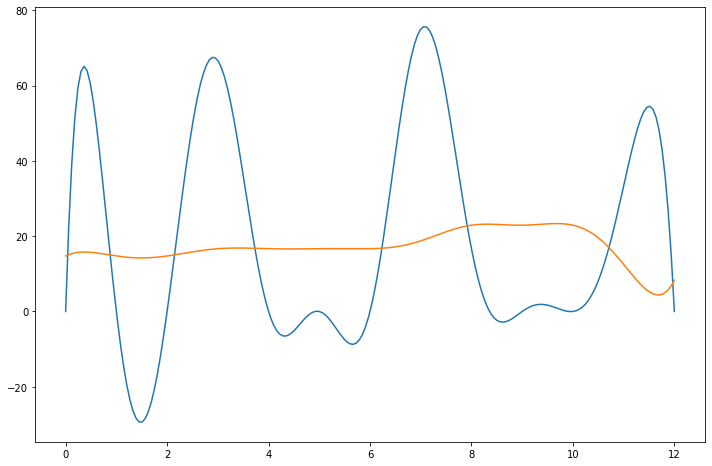

In [151]:
scores_vis.weekly_score_smooth(scores.weekly_score(data,'preparedness'),'preparedness')

In [115]:
df = data[(data.need_want=='Essential')|((data.transaction_class=='Loans&Credit')&(data.type=='DEBIT'))][['timestamp','amount']]
df.timestamp=df.timestamp.apply(lambda x:pd.Timestamp(x))
df.amount=0-(df.amount)
df['month']=df.timestamp.dt.month_name()
df.groupby('month')['amount'].sum()

month
December    143.52
February    664.70
January     664.70
March       521.18
Name: amount, dtype: float64